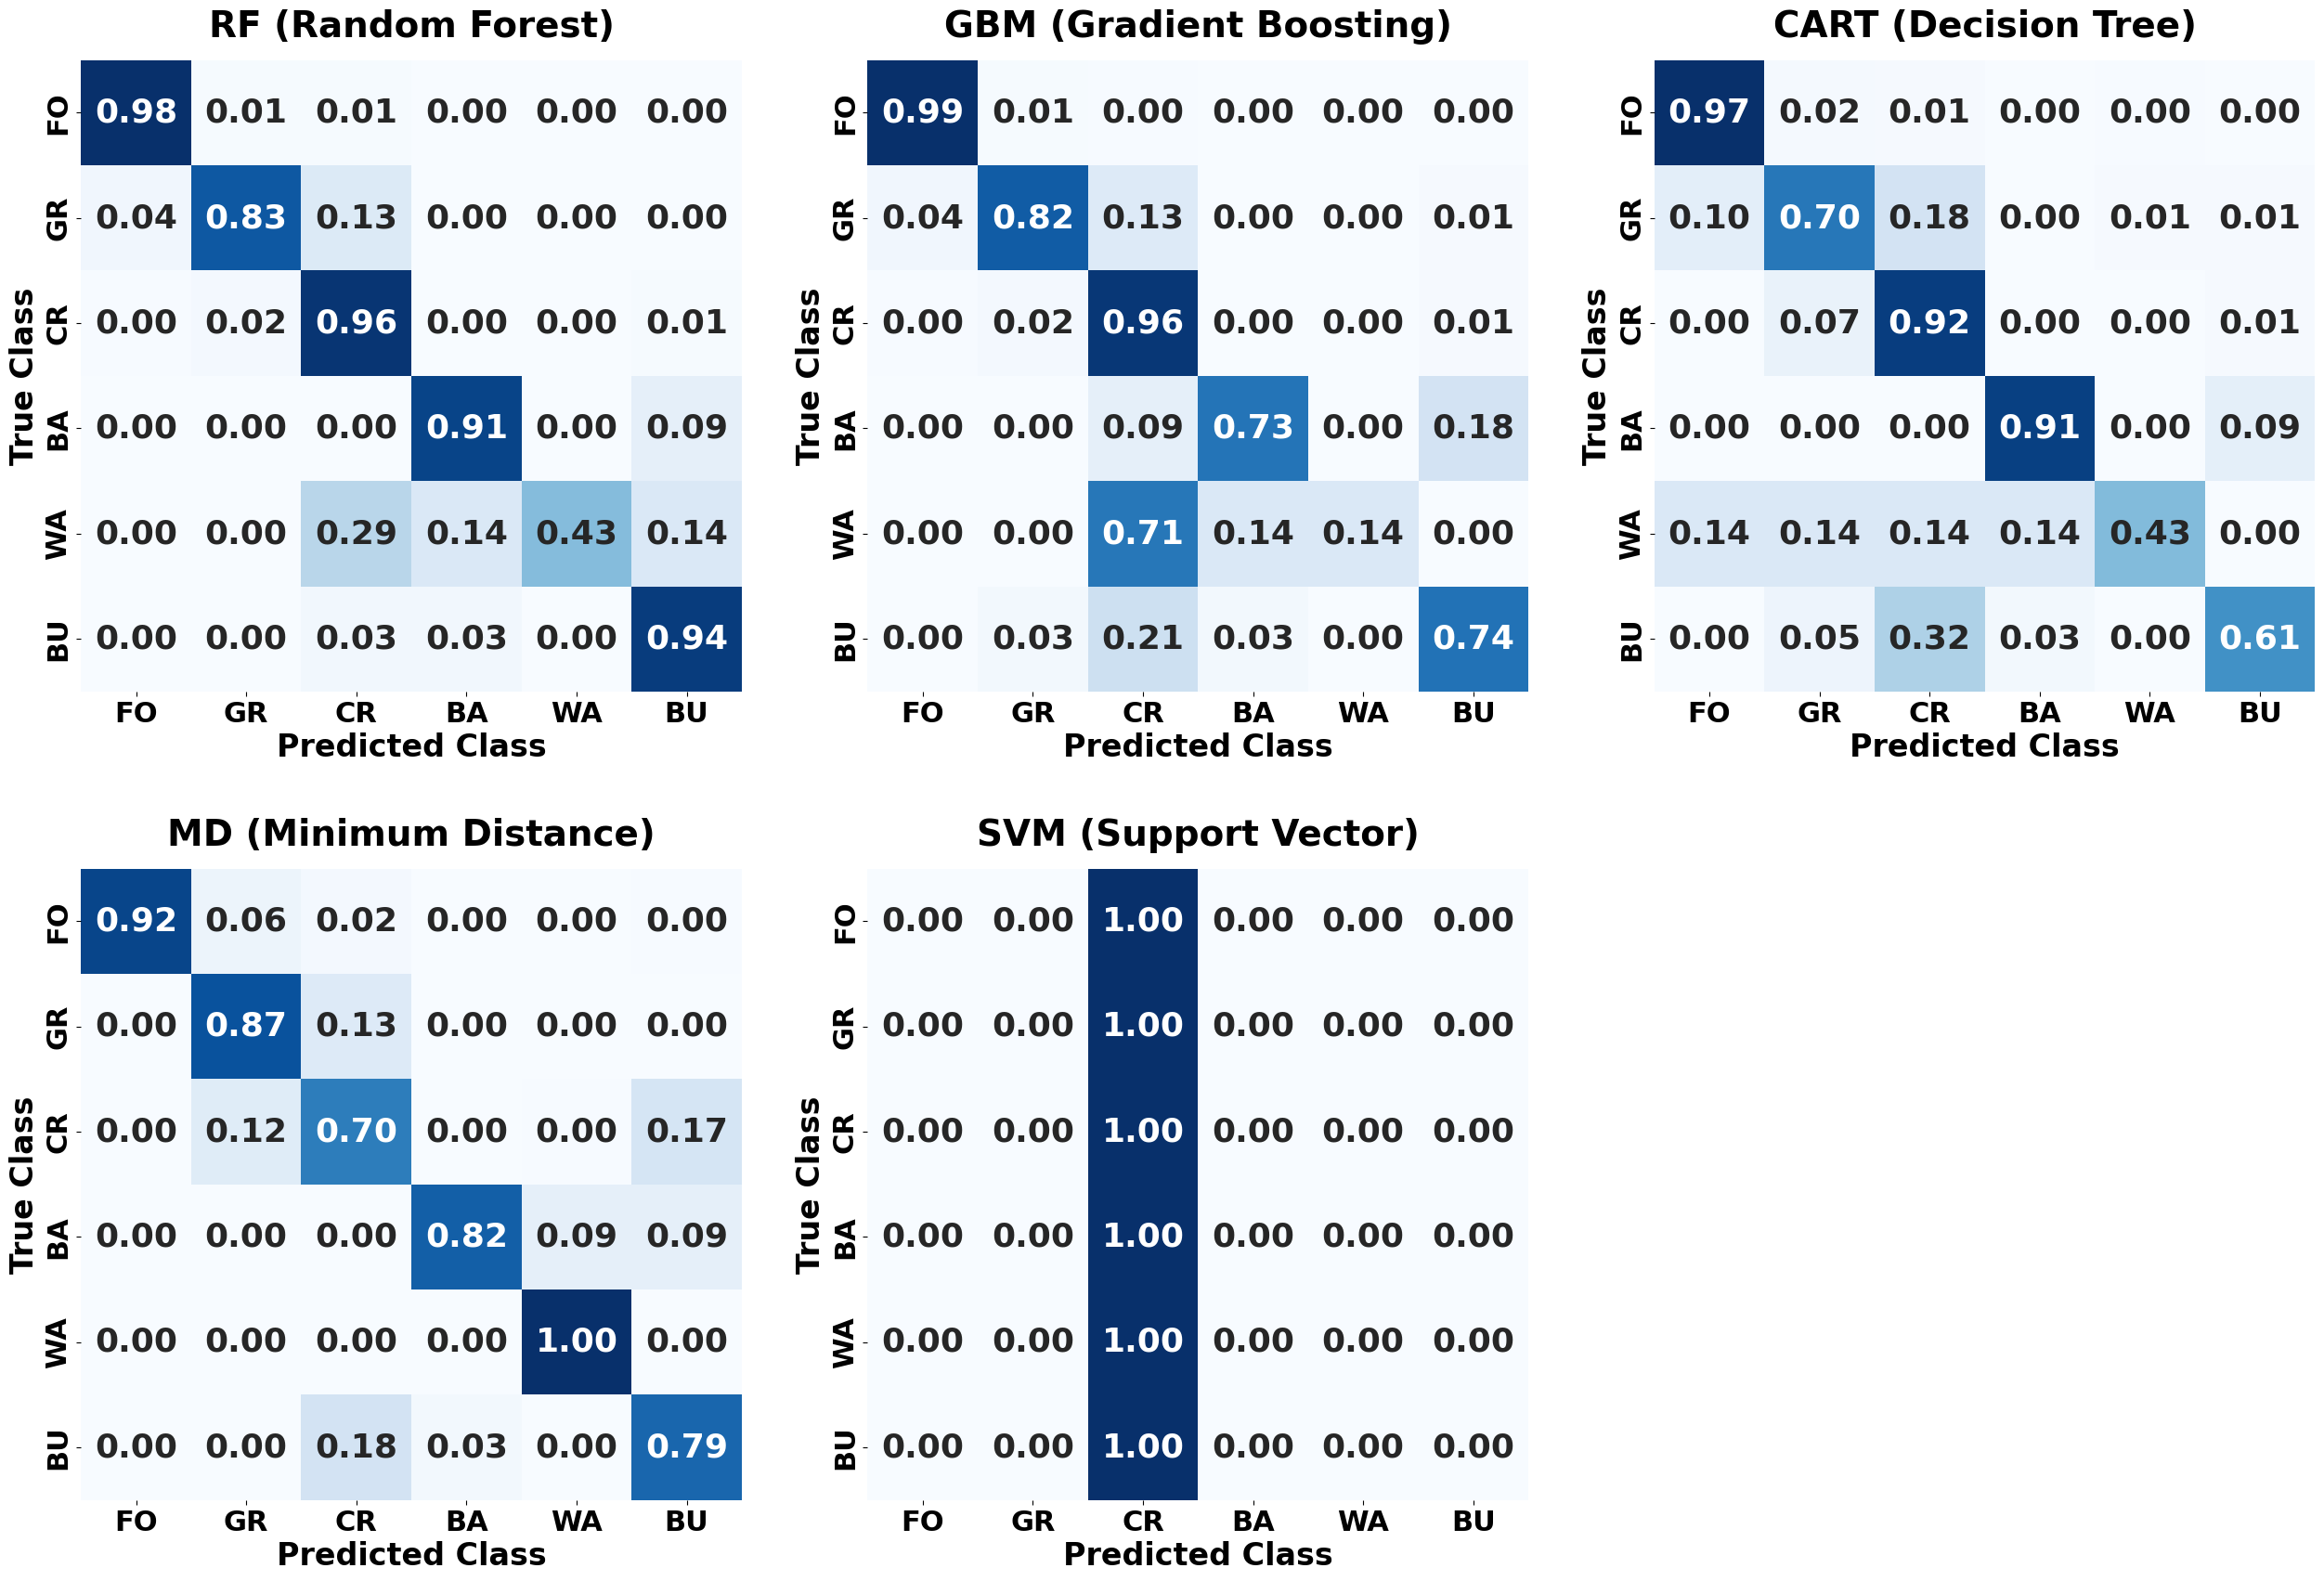

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Define Class Labels
labels = ['FO', 'GR', 'CR', 'BA', 'WA', 'BU']

# 2. Setup Data Dictionary for all 5 Classifiers
data = {
    'RF (Random Forest)': np.array([
        [246, 2, 2, 0, 0, 0], [3, 70, 11, 0, 0, 0], [1, 5, 212, 0, 0, 2],
        [0, 0, 0, 10, 0, 1], [0, 0, 2, 1, 3, 1], [0, 0, 1, 1, 0, 29]
    ]),
    'GBM (Gradient Boosting)': np.array([
        [247, 2, 1, 0, 0, 0], [3, 69, 11, 0, 0, 1], [1, 5, 211, 0, 0, 3],
        [0, 0, 1, 8, 0, 2], [0, 0, 5, 1, 1, 0], [0, 1, 8, 1, 0, 28]
    ]),
    'CART (Decision Tree)': np.array([
        [242, 4, 3, 0, 1, 0], [8, 59, 15, 0, 1, 1], [0, 15, 202, 0, 0, 3],
        [0, 0, 0, 10, 0, 1], [1, 1, 1, 1, 3, 0], [0, 2, 12, 1, 0, 23]
    ]),
    'MD (Minimum Distance)': np.array([
        [230, 14, 5, 0, 0, 1], [0, 73, 11, 0, 0, 0], [0, 26, 155, 0, 1, 38],
        [0, 0, 0, 9, 1, 1], [0, 0, 0, 0, 7, 0], [0, 0, 7, 1, 0, 30]
    ]),
    'SVM (Support Vector)': np.array([
        [0, 0, 250, 0, 0, 0], [0, 0, 84, 0, 0, 0], [0, 0, 220, 0, 0, 0],
        [0, 0, 11, 0, 0, 0], [0, 0, 7, 0, 0, 0], [0, 0, 31, 0, 0, 0]
    ])
}

# 3. Plotting Function with EXTRA Large Font Settings
def plot_comparative_matrices_largest(data_dict):
    fig, axes = plt.subplots(2, 3, figsize=(26, 18))
    axes = axes.flatten()

    for i, (name, cm) in enumerate(data_dict.items()):
        row_sums = cm.sum(axis=1)[:, np.newaxis]
        row_sums[row_sums == 0] = 1
        cm_norm = cm.astype('float') / row_sums

        sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=labels, yticklabels=labels, ax=axes[i], cbar=False,
                    annot_kws={"size": 26, "weight": "bold"})

        axes[i].set_title(name, fontsize=28, fontweight='bold', pad=18)
        axes[i].set_ylabel('True Class', fontsize=24, fontweight='bold')
        axes[i].set_xlabel('Predicted Class', fontsize=24, fontweight='bold')
        axes[i].tick_params(axis='both', which='major', labelsize=22)

    fig.delaxes(axes[5])
    plt.tight_layout(pad=3.0)
    plt.savefig('Figure3_Confusion_Matrices.png', dpi=300)
    plt.show()

plot_comparative_matrices_largest(data)

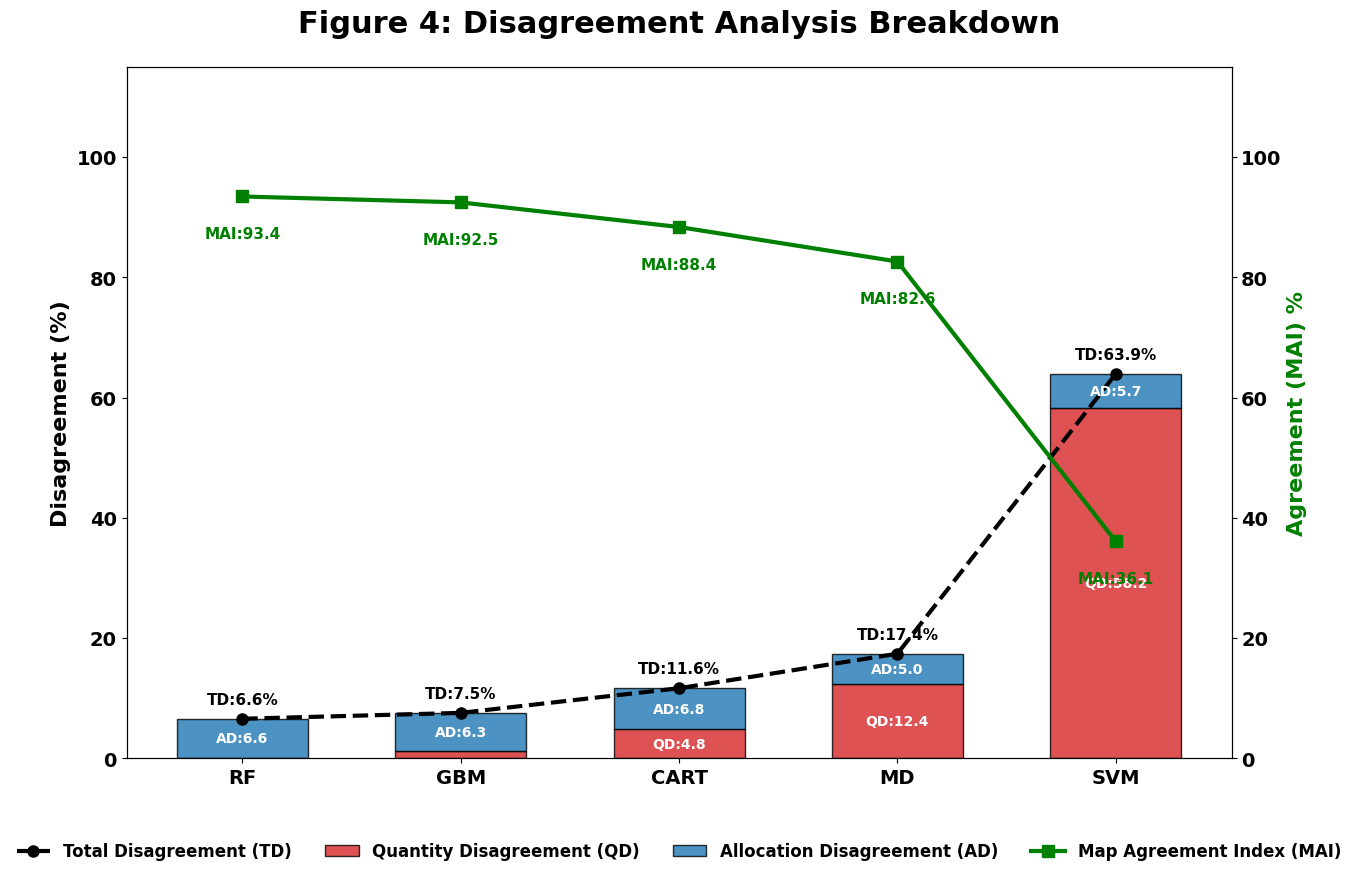

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Data Setup
models = ['RF', 'GBM', 'CART', 'MD', 'SVM']
oa_vals = np.array([93.44, 92.46, 88.36, 82.62, 36.07])
td_vals = 100 - oa_vals
mai_vals = oa_vals
qd_vals = np.array([0.0, 1.2, 4.8, 12.4, 58.2])
plot_ad = td_vals - qd_vals

# 2. Plotting Setup
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
fig, ax1 = plt.subplots(figsize=(14, 9))

# Stacked Bar Chart
bar_width = 0.6
p1 = ax1.bar(models, qd_vals, color='#d62728', alpha=0.8, label='Quantity Disagreement (QD)', edgecolor='black', width=bar_width)
p2 = ax1.bar(models, plot_ad, bottom=qd_vals, color='#1f77b4', alpha=0.8, label='Allocation Disagreement (AD)', edgecolor='black', width=bar_width)

# Line for TD (Total Disagreement)
ax1.plot(models, td_vals, color='black', linestyle='--', marker='o', linewidth=3, markersize=8, label='Total Disagreement (TD)')

# Secondary Axis for MAI (Agreement)
ax2 = ax1.twinx()
ax2.plot(models, mai_vals, color='green', linestyle='-', marker='s', linewidth=3, markersize=8, label='Map Agreement Index (MAI)')

# 3. ADDING INTERNAL LABELS (QD, AD, MAI)
for i in range(len(models)):
    # Label for QD (inside red bar) - only if value > 0
    if qd_vals[i] > 2:
        ax1.text(i, qd_vals[i]/2, f'QD:{qd_vals[i]:.1f}', ha='center', va='center', color='white', fontsize=10)

    # Label for AD (inside blue bar)
    if plot_ad[i] > 2:
        ax1.text(i, qd_vals[i] + (plot_ad[i]/2), f'AD:{plot_ad[i]:.1f}', ha='center', va='center', color='white', fontsize=10)

    # Label for TD (on top of the bar)
    ax1.text(i, td_vals[i] + 2, f'TD:{td_vals[i]:.1f}%', ha='center', va='bottom', fontsize=11, color='black')

    # Label for MAI (along the green line)
    ax2.text(i, mai_vals[i] - 5, f'MAI:{mai_vals[i]:.1f}', ha='center', va='top', color='green', fontsize=11)

# Formatting
ax1.set_ylabel('Disagreement (%)', fontsize=16, fontweight='bold')
ax2.set_ylabel('Agreement (MAI) %', fontsize=16, fontweight='bold', color='green')
ax1.set_ylim(0, 115); ax2.set_ylim(0, 115)
ax1.set_title('Figure 4: Disagreement Analysis Breakdown', fontsize=22, fontweight='bold', pad=25)

# Legend placement
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=12)

plt.tight_layout()
plt.savefig('Figure4_Disagreement_Labeled.png', dpi=300, bbox_inches='tight')
plt.show()

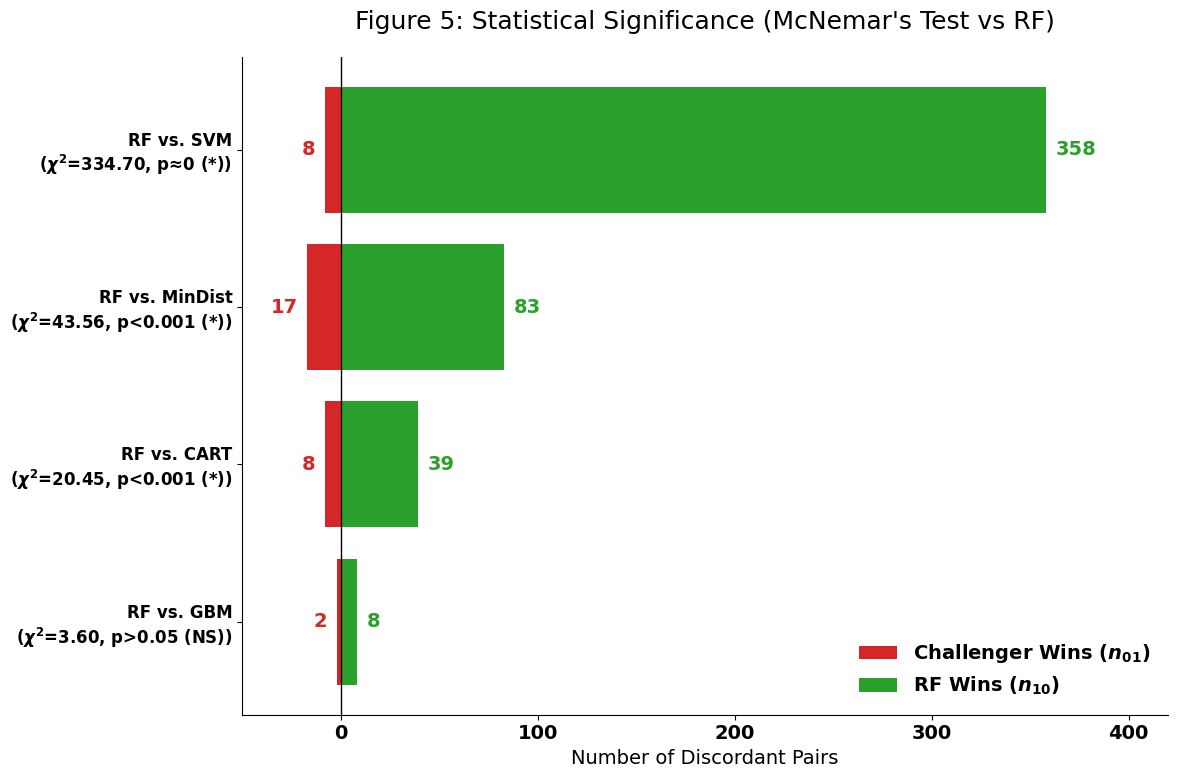

In [6]:
# 1. Define McNemar Data
comparisons = ["RF vs. GBM", "RF vs. CART", "RF vs. MinDist", "RF vs. SVM"]
rf_wins = np.array([8, 39, 83, 358])
challenger_wins = np.array([2, 8, 17, 8])
chi2_stats = ["3.60", "20.45", "43.56", "334.70"]
significance = ["p>0.05 (NS)", "p<0.001 (*)", "p<0.001 (*)", "p≈0 (*)"]

# 2. Plotting
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(comparisons))

ax.barh(y_pos, -challenger_wins, color='#d62728', label='Challenger Wins ($n_{01}$)')
ax.barh(y_pos, rf_wins, color='#2ca02c', label='RF Wins ($n_{10}$)')

for i in range(len(comparisons)):
    ax.text(rf_wins[i] + 5, i, str(rf_wins[i]), va='center', color='#2ca02c', fontweight='bold')
    ax.text(-challenger_wins[i] - 5, i, str(challenger_wins[i]), va='center', ha='right', color='#d62728', fontweight='bold')

# Corrected LaTeX string with fr"" to avoid SyntaxWarning
labels_with_stats = [fr"{comp}" + "\n" + fr"($\chi^2$={chi}, {sig})" for comp, chi, sig in zip(comparisons, chi2_stats, significance)]

ax.set_yticks(y_pos)
ax.set_yticklabels(labels_with_stats, fontsize=12, fontweight='bold')
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-50, 420)
ax.set_xlabel('Number of Discordant Pairs', fontsize=14)
ax.set_title('Figure 5: Statistical Significance (McNemar\'s Test vs RF)', fontsize=18, pad=20)
ax.legend(loc='lower right', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Figure5_McNemar.png', dpi=300)
plt.show()